In [1]:
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
import math

## 3.1. Different approaches of Quantum Machine Learning (QML)

* There are four different approaches to combining quantum computing and machine learning, differentiated by whether the data is classical (C) or quantum (Q), or whether the algorithm runs on a classical (C) or quantum (Q) computer. 

![qml_approaches.png](images/quantum_nn/qml_approaches.png)

* The above categories can be defined as follows


### 3.1.1. The classical classical (CC) category 

* This approach refers to the processing of classical data from classical Machine Learning (ML) algorithms. 
* This is, of course, the conventional ML approach, but in this context it refers to ML based on methods borrowed from quantum information research. 
* Here we can include "quantum-inspired" ML algorithms.
* The advantage of quantum-inspired ML is that it can offer improved performance over classical algorithms, especially in terms of classification accuracy. 
* Their main limitation is that they operate only on classical computers, so the advantages of quantum computers cannot be exploited. 

### 3.1.2. The quantum classical (QC) category 

* This approach investigates how machine learning can help in many areas in the quantum computing, such as qubit characterization, control and readout.
* For example, when we want to obtain a complete description of the internal state of a quantum computer from as few measurements as possible, we can use machine learning to analyze the measurement data. 

### 3.1.3. The classical quantum (CQ) category 

* This approach uses quantum computing to process classical datasets . 
* Classical data sets, such as texts, images or time series, are fed into a quantum computer for analysis through a classical-quantum interface. 
* Several strategies are possible here, from translating classical ML models into the language of quantum algorithms, to genuinely new models derived from the working principles of quantum computers.
* Within this category there are two main challenges: 
    - Quantum algorithms work with quantum data, but we are supplying them with classical data, so it is necessary to apply quantum coding techniques. 
    - These algorithms must run on a quantum computer, whose hardware is currently limited, both in the number of qubits and in the reliability of qubits, so circuit design is nowadays a challenge. The use of quantum simulators makes it possible to solve many of the problems of real quantum computers, but at the cost of losing the quantum advantage they offer. 
* Although it is generally considered that classical-quantum approach algorithms tend to improve time complexity and can learn from less data, due to the constraints discussed above it is not sufficiently clear that these advantages are applicable to real-world problems. 
* CQ will be the focus of this chapter.

### 3.1.4. The quantum quantum (QQ) category

* This approach uses quantum computing to process quantum data. 
* The most natural scenario of this approach is one in which a quantum computer is first used to simulate the dynamics of a quantum system and, consequently, takes the state of the quantum system as input for a quantum ML algorithm executed on the same device. 
* The advantage of this approach is that, the quantum computer has immediate access to all the quantum state information and can produce the result directly.
* This is an interesting topic, but very much still in its infancy.

## 3.2. Parameterized quantum circuits

* Parameterized quantum circuits are circuits in which the gates are defined through tunable parameters
* This kind of circuits are a fundamental building block of near-term quantum machine learning algorithms. 
* In the literature, depending on the context, parameterized quantum circuits are also called parameterized __trial states__, __variational forms__, or __ansatzes__.

### 3.2.1. Parameters and parameter vectors

* We can create parameterized circuits in Qiskit using the `Parameter` class. 
* This class lets us add, for example, rotation gates, without having to specify what the angles are yet.

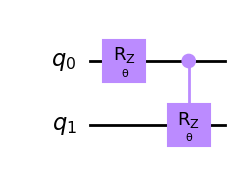

In [2]:
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw("mpl")

* If we want the gates to have different parameters, we can use two Parameters, or we create a `ParameterVector`, which acts like a list of Parameters

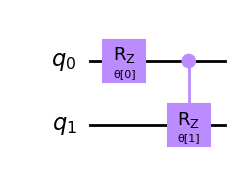

In [3]:
theta_list = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw("mpl")

* A parameterized circuit can be described as a unitary operation on $n$ qubits, $U_\theta$, acting on some initial state $|\phi_0\rangle$, often set to $|0\rangle^{\otimes n}$. 
* The resulting parameterized quantum state is $|\phi_\theta\rangle = U_\theta |\phi_0\rangle$  where $\theta$ is a set of tunable parameters.

### 3.2.2. Properties of parameterized circuits

* To use parameterized quantum circuits as a machine learning model, we need them to generalize well. 
* This means that the circuit should be able to generate a significant subset of the states within the output Hilbert space.
* To avoid being easy to simulate on a classical computer, the circuit should also entangle qubits.

#### Expressibility

> _The extent to which a parameterized circuit is able to generate states within the Hilbert space._

* Let's compare the two following single-qubit circuits to get a sense of what it means for a circuit to be expressible or not, by sampling 2000 output states for each circuit and plotting them on a Bloch sphere.

* In the first circuit we see output states distributed about the equator of the Bloch sphere.

![expressibility_1.png](images/quantum_nn/expressibility_1.png)

* In the second circuit, with an additional parameterized-rotation gate, we can cover all the Bloch sphere with output states, but the coverage is not uniform; there are concentrations of points on the $+X$ and $-X$ poles of the Bloch sphere.

![expressibility_2.png](images/quantum_nn/expressibility_2.png)

* Expressibility is a way to quantify what we just observed for these single-qubit circuits. 
* The first circuit would have a low expressibility score due to the limited set of states it can explore, whereas the second circuit would have a high expressibility score.

#### Entangling capability

> _The ability of a parameterized circuit to generate entangled states._

* Entanglement is a key resource in quantum computing. 
* The Meyer-Wallach measure is one of many metrics that measures how entangled a given state is. 
     - The Meyer-Wallach measure of an unentangled product state (a state that can be written as the product of two separate kets) is 0, 
    -  The Meyer-Wallach measure of a highly entangled state, such as the Bell state, is 1.
* A way to measure the entangling capability of a parameterized quantum circuit is by the average Meyer-Wallach measure for the states it can generate.    

* For example, consider the following multi-qubit parameterized circuits:

![entangling.png](images/quantum_nn/entangling.png)

* Circuit A has no entangling operations, that is, no two-qubit gates, so it has no entangling capability. Thus, this circuit would produce states that have Meyer-Wallach measures of 0, leading to an averaged value of 0. 
* Circuit B has several two-qubit gates, so it can generate quantum states with some entanglement. Therefore, the average Meyer-Wallach measure would be greater than 0.

* The Variational Quantum Classifier (VQC) have a strong correlation between classification accuracy and expressibility, and a weak correlation between classification accuracy entangling capability.

#### Hardware efficiency

> _How well the circuit will perform on near-term quantum hardware._

* In this era of near term quantum computing, where devices have limited qubit connectivity, coherence times and gate fidelities, the depth of the circuits we run directly affects the accuracy of our results, since there is limited error correction or mitigation.

* Hardware efficient parameterized circuits use a limited set of quantum gates as well as a particular qubit connection topology to accomodate these constraints. 

* The gate set usually consists of one two-qubit entangling gate and up to three single-qubit gates. The circuit is then constructed from blocks of single-qubit gates and entangling gates, which are applied to multiple or all qubits in parallel. 

* One sequence of a single-qubit and an entangling block is called a layer, and the parameterized circuit generally has multiple layers.


## 3.3.	Data encoding

* Data representation is crucial for the success of machine learning models. For classical machine learning, the problem is how to represent the data numerically, so that it can be best processed by a classical machine learning algorithm.

* For quantum machine learning, this question is similar, but more fundamental: how to represent and efficiently input the data into a quantum system, so that it can be processed by a quantum machine learning algorithm. This is usually referred to as data encoding, but is also called data embedding or loading.

* This process is a critical part of quantum machine learning algorithms and directly affects their computational power.

### 3.3.1. Preprocessing

* Una de las tareas que hay que realizar con los datos antes de alimentar a un modelo de aprendizaje automático es realizar su preprocesado. Esta operación es necesaria porque los ordenadores no comprenden textos, imágenes o vídeos como tal, solo entienden unos y ceros. Además, los datos pueden venir de varias fuentes, con formatos diferentes, con errores, valores perdidos, dimensiones diferentes, no estar balanceados, etc. Un buen preprocesamiento de datos es el factor más importante que puede marcar la diferencia entre un buen modelo y un mal modelo de aprendizaje automático.

* El preprocesamiento de datos en el aprendizaje automático puede dividirse a grandes rasgos en tres partes principales: Integración de datos, limpieza de datos y transformación de datos.

![preprocessing.png](images/quantum_nn/preprocessing.png)

#### Data integration

* La integración de datos consiste en combinar datos procedentes de distintas fuentes y ofrecer a los usuarios una visión unificada de los mismos. La integración de datos aparece con más frecuencia en problemas con grandes volúmenes de datos (big data).

#### Data cleaning

* La limpieza de datos es el proceso de detectar y corregir (o eliminar) los registros corruptos, inexactos o irrelevantes de los datos. Se compone, entre otras, de las siguientes tareas:

    - __Tratamiento de datos incompletos__: No es infrecuente que falten algunos datos en el conjunto de datos del mundo real. La mayoría de los algoritmos de aprendizaje automático no funcionan con datos ausentes o nulos, por lo que es necesario eliminarlos o extrapolar dichos valores a partir de otros valores de la muestra.

    - __Eliminación del ruido en los datos__: El ruido son observaciones de datos ligeramente erróneas que no se ajustan a la tendencia o distribución del resto de los datos. Aunque cada error puede ser pequeño, el conjunto de datos ruidosos da lugar a un modelo de aprendizaje automático deficiente.

    - __Eliminación de los valores atípicos de los datos__: Los valores atípicos son aquellas observaciones que tienen valores extremos, mucho más allá del rango normal de valores para esa característica. Unos pocos valores atípicos en un conjunto de datos pueden contribuir a reducir la precisión del modelo de aprendizaje automático.

    - __Tratamiento de datos duplicados__: La forma de tratar los datos duplicados depende de si éstos representan la realidad o se trata más bien de una incoherencia. Si se trata de lo primero, los datos duplicados deben conservarse; si no, deben eliminarse.

    - __Eliminación de incoherencias en los datos__: Algunos datos pueden no ser coherentes con las reglas del domino. Esto requiere un conocimiento del dominio para identificar tales incoherencias y tratarlas.

#### Data transformation

* La transformación de datos es el proceso de convertir datos de un formato o estructura a otro formato diferente pero más adecuado para su manejo y análisis. Se compone de las siguientes tareas:

    - __Escalado de características__: Varias características del conjunto de datos pueden tener su propio rango de valores y ser muy diferentes entre sí. Estas enormes diferencias entre los rangos de las características de un conjunto de datos pueden distorsionar la formación de un modelo de aprendizaje automático, por lo que es necesario poner en común dichos rangos.

    - __Tratamiento de datos categóricos__: La mayoría de los algoritmos de aprendizaje automático sólo trabajan con datos numéricos y no son capaces de procesar datos categóricos. Por lo tanto, necesitamos transformar los datos categóricos en forma numérica sin perder el sentido de la información.

    - __Tratamiento de datos no balanceados__: Los conjuntos de datos no balanceados son aquellos en los que la mayoría de los datos pertenecen a una sola clase y muy pocos a otras. Existen algoritmos como SMOTE (Synthetic Minority Oversampling Technique) que permiten formar conjuntos de datos balanceados a partir de datos sintéticos.

    - __Reducción de la dimensionalidad__: A veces, demasiada información no es buena. Esto también se aplica a los conjuntos de datos que tienen demasiadas características (dimensiones). Un modelo entrenado con cientos de características puede no dar los resultados adecuados. Esto es lo que se conoce como la "maldición de la dimensionalidad". Para evitarlo, tenemos que reducir la dimensión del conjunto de datos mediante métodos como el Análisis de Componentes Principales (PCA) o el Análisis Discriminante Lineal (LDA).

    - __Ingeniería de características__: La ingeniería de características es el arte de crear nuevas características a partir de los datos dados, ya sea aplicando algún conocimiento del dominio o sentido común. La ingeniería de características puede enriquecer el conjunto de datos con más información y puede contribuir a desarrollar un buen modelo de aprendizaje automático, pero es un proceso costoso y complejo. El aprendizaje profundo se caracteriza por ser capaz de desarrollar modelos con alta exactitud a partir de los datos “crudos”, sin necesitar realizar ingeniería de características.

    - __División de los datos en entrenamiento y prueba__: Uno de los principales problemas del aprendizaje automático es el sobreaprendizaje, que ocurre cuando nuestro modelo se ajusta tan bien a los datos de entrenamiento que ha perdido su capacidad de generalización y sus predicciones no son correctas para los nuevos casos. Para paliarlo se divide el conjunto de datos en dos partes: entrenamiento y test, e incluso a veces en tres partes: entrenamiento, test y validación. La idea es usar los datos de entrenamiento para entrenar el modelo, los datos de validación para ajustar los hiperparámetros y dejar los datos de test, que el modelo no ha utilizado todavía, para comprobar las capacidades de generalización del mismo a través de distintas métricas.


### 3.3.2. Encoding

* Data representation is crucial for the success of machine learning models. 
* For classical machine learning, the problem is how to represent the data numerically, so that it can be best processed by a classical machine learning algorithm.
* For quantum machine learning, this question is similar, but more fundamental: how to represent and efficiently input the data into a quantum system, so that it can be processed by a quantum machine learning algorithm. 
* This is usually referred to as "data encoding", but is also called "data embedding" or "loading".
* This process is a critical part of quantum machine learning algorithms and directly affects their computational power.

![encoding_quantum.png](images/quantum_nn/encoding_quantum.png)

* Como podemos ver, la fase de codificación involucra el mapeo de datos de estados clásicos a cuánticos. En la segunda fase, la computación cuántica depende del tipo de algoritmos QML. El tercer paso, la fase de decodificación o read out, consiste en realizar las medidas para mapear los datos de salida de los estados cuánticos a los clásicos. 

#### Methods

* Let's consider a classical dataset $\mathcal{X}$ consisting of $M$ samples, each with $N$ features.

$$
\mathcal{X} = {x^{(1)}, \dots, x^{(m)}, \dots, x^{(M)}}
$$

where $x^{(m)}$ is an $N$ dimensional vector for $m = 1, \dots, M$ . 

* To represent this dataset in a qubit system, we can use various embedding techniques.

### 3.3.3. Basis encoding

![encoding_basis.png](images/quantum_nn/encoding_basis.png)

source: https://quantumcomputingpatterns.org/

* __Definition__
    - Basis encoding is the simplest method for encoding data into quantum data.
    - Basis encoding associates a classical $N$-bit string with a computational basis state (the Z-basis states that we obtain when  we measure in the Z basis) of a $N$-qubit system. 
    - It is used when in the classical world we have characteristics represented by numbers that are encoded in binary form, and which will later be converted into a quantum state in a computational basis.
* __Example__
    - For example, if $x=5$, this can be represented as a $4$-bit string as $0101$, and by a $4$-qubit system as the quantum state $|0101\rangle$. 

* __In general__
    - For an $N$-bit string: $x=(b_1, b_2, \dots, b_N)$, the corresponding $N$-qubit state is $|x\rangle = |b_1, b_2, \dots, b_N\rangle$ with $b_n \in {0, 1}$ for $N = 1, \dots N$.
    - For the classical dataset $\mathcal{X}$ described above, to use basis encoding, each data point must be a $N$-bit string: $x^{(m)} = (b_1, b_2, \dots, b_N)$, which then can be mapped directly to the quantum state $|x^m\rangle = |b_1, b_2, \dots, b_N\rangle$ with for $n = 1, \dots N$ and $m = 1, \dots M$. 

    - We can represent the entire dataset as superpositions of computational basis states:

$$
|\mathcal{X}\rangle = \frac{1}{\sqrt(M)}\sum_{m=1}^{M}|x^m\rangle
$$

<!--* Related methods:
    - This pattern is a refinement of arbitrary initialization
    - If an algorithm requires several numbers as input, each can be encoded in BASIC ENCODING which can be processed by the Quantum Associative Memory (QuAM) pattern.-->

#### Example

![encoding_basis_example.png](images/quantum_nn/encoding_basis_example.png)

#### Example

<img src="images\quantum_nn\basis_encoding_1.png" alt="basis_encoding_1.png" width="500">

<img src="images\quantum_nn\basis_encoding_2.png" alt="basis_encoding_2.png" width="500">



#### Code

* In Qiskit, once we calculate what state will encode our dataset, we can use the `initialize` function to prepare it. 
* For example, the dataset $\mathcal{X} = {x^{(1)} = 101, x^{(2)} = 111}$ is encoded as the state $|\mathcal{X}\rangle = \frac{1}{\sqrt{2}}(|101\rangle+|111\rangle)$
* This example illustrates a couple of disadvantages of basis encoding. While it is simple to understand, the state vectors can become quite sparse, and schemes to implement it are usually not efficient.

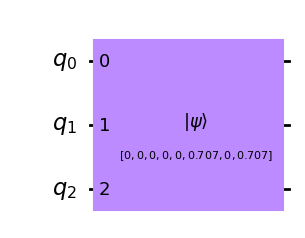

In [4]:
desired_state = [
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(2),
    0,
    1 / math.sqrt(2)]

qc = QuantumCircuit(3)
qc.initialize(desired_state, [0,1,2])
qc.draw("mpl")

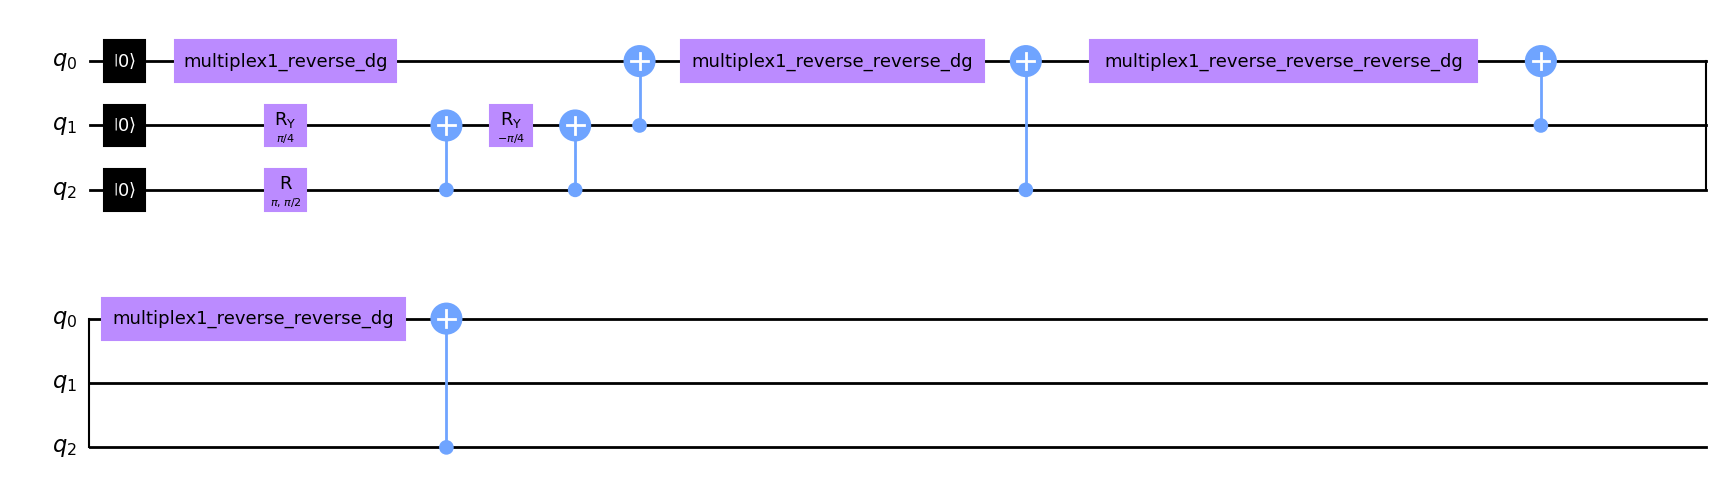

In [5]:
qc.decompose().decompose().decompose().decompose().decompose().draw("mpl")

### 3.3.4. Amplitude encoding

![encoding_amplitude.png](images/quantum_nn/encoding_amplitude.png)

* __Definition__
    - Amplitude encoding encodes data into the amplitudes of a quantum state. 
    - To encode a classical data vector into quantum amplitudes, the classical vector must be converted into a normalized classical vector. 
    - It represents a normalised classical $N$-dimensional data point, $x$, as the amplitudes of a $n$-qubit quantum state, $|\psi_x\rangle$, where $N = 2^n$, $x_i$, is the $i^{th}$ element of $x$ and $|i\rangle$ is the $i^{th}$ computational basis state.

$$
|\psi_x\rangle = \sum_{i=1}^{N}x_i|i\rangle
$$
 
* __Normalization__
    - To encode the classical dataset $\mathcal{X}$ described above, we concatenate all $M$ $N$-dimensional data points into one amplitude vector, of length $N \times M$, where $A_\text{norm}$ is a normalisation constant, such that $|\alpha|^2 = 1$.

$$
\alpha = A_\text{norm}(x_1^{(1)}, \dots, x_N^{(1)}, \dots, x_1^{(m)}, \dots, x_N^{(m)}, \dots, x_1^{(M)}, \dots, x_N^{(1)})
$$

* The dataset $\mathcal{X}$ can now be represented in the computational basis as:

$$
|\mathcal{X}\rangle = \sum_{i=1}^{N}\alpha_i|i\rangle
$$ 
 
where $\alpha_i$ are elements of the amplitude vector and $|i\rangle$ are the computational basis states. 

* __Number of qubits__
    - The number of amplitudes to be encoded is $N \times M$. 
    -  As a system of $n$ qubits provides $2^n$ amplitudes, amplitude embedding requires $n \ge \log_2(NM)$ qubits.
    - This is a compact representation.

#### Example 

![encoding_basis_example.png](images/quantum_nn/encoding_amplitude_example.png)

#### Example

<img src="images\quantum_nn\amplitude_encoding.png" alt="amplitude_encoding.png" width="500">

#### Code

* Let's encode the dataset $\mathcal(X) = {x^{(1)} = (1.5, 0), x^{(2}) = (-2, 3)$ using amplitude encoding. 
* Concatenating both data points and normalizing the resulting vector, we get:

$$
\alpha = \frac{1}{\sqrt(15.25)}(1.5, 0, -2, 3)
$$
 
* The resulting 2-qubit quantum state would be:

$$
|\mathcal{X} = \frac{1}{\sqrt(15.25)}(1.5|00\rangle, -2|10\rangle, 3|11\rangle) 
$$
 
* In this case the total number of elements of the amplitude vector, $N \times M$, is a power of 2. 
* When  is not a power of 2, we can simply choose a value for $n$ such that $2^n \ge MN$ and pad the amplitude vector with uninformative constants.
* Like in basis encoding, once we calculate what state will encode our dataset, in Qiskit we can use the initialize function to prepare it:

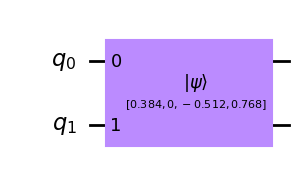

In [6]:
desired_state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]

qc = QuantumCircuit(2)
qc.initialize(desired_state, [0,1])
qc.draw("mpl")

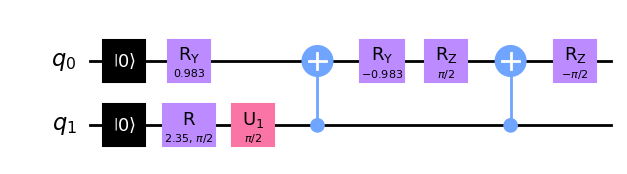

In [7]:
qc.decompose().decompose().decompose().decompose().decompose().draw("mpl")

### 3.3.5. Angle encoding

![encoding_angle.png](images/quantum_nn/encoding_angle.png)

* __Definition__
    - Angular encoding is one of the most basic way of encoding classical data in a quantum state. 
    - The $n$ classical features are encoded in the rotation angle of $n$ qubit. 
    - More specifically, angle encoding encodes $N$ features into the rotation angles of $n$ qubits, where $N \le n$.
    - For example, the data point $x = (x_1, \dots, x_N)$ can be encoded as following, where $\bigotimes$ represents the tensor product operation over $N$ qubits.

$$
|x\rangle = \bigotimes_{i=1}^{N}\cos(x_i)|0\rangle + \sin(x_i)|1\rangle
$$

* __Diference with other methods__ 
    - This is different from the previous two encoding methods, as it only encodes one data point at a time, rather than a whole dataset. 
    - It can easily be seen that one qubit is needed per data point which is not optimal.
    - It uses a constant depth quantum circuit, making it amenable to current quantum hardware.
    - This algorith is efficient in terms of operations to avoid decoherence problems.
    


* __Rotations using the $R_Y$ gate__

* We can specify angle encoding as a unitary

$$
S_{x_j} = \bigotimes_{i=1}^{N}U\left(x_j^{(1)}\right)
$$

where:

$$
U\left(x_j^{(1)}\right) = 
\begin{bmatrix}
\cos \left(x_j^{(1)}\right) & -\sin \left(x_j^{(1)}\right) \\
\sin \left(x_j^{(1)}\right) & \cos \left(x_j^{(1)}\right) 
\end{bmatrix}
$$

* Remembering that a single-qubit rotation around the $Y$-axis is:

$$
R_Y(\theta) = e^{-i\frac{\phi}{2}Y} = 
\begin{bmatrix}
\cos \frac{\theta}{2} & -\sin \frac{\theta}{2} \\
\sin \frac{\theta}{2} & \cos \frac{\theta}{2} 
\end{bmatrix}
$$

* We note that $U\left(x_j^{(1)}\right) = R_Y\left(2x_j^{(1)}\right)$

![encoding_angle_solution.png](images/quantum_nn/encoding_angle_solution.png)

#### Example, 

* Encode the data point $x = (0, \pi/4, \pi/2)$ using Qiskit:

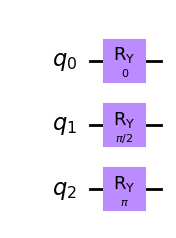

In [8]:
qc = QuantumCircuit(3)
qc.ry(0, 0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.draw("mpl")

### 3.3.6. Feature Maps

#### Arbitrary encoding

* Arbitrary encoding encodes $N$ features as rotations on $N$ parameterized gates on $n$ qubits, where $n \le N$. 
* Like angle encoding, it only encodes one data point at a time, rather than a whole dataset. 
* It also uses a constant depth quantum circuit and $n \le N$ qubits, meaning it can be run on current quantum hardware.
* For example, to use the Qiskit `EfficientSU2` circuit to encode 12 features, would only use 3 qubits:

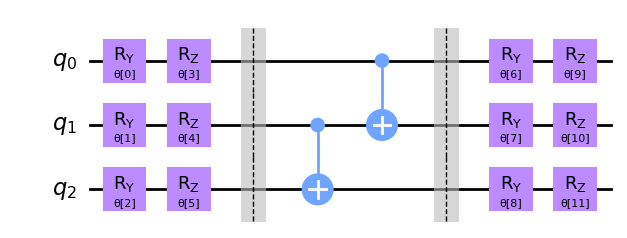

In [2]:
from qiskit.circuit.library import EfficientSU2
circuit = EfficientSU2(num_qubits=3, reps=1, insert_barriers=True)
circuit.decompose().draw("mpl")

* Here we encode the data point $x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]$ with 12 features, using each of the parameterized gates to encode a different feature.

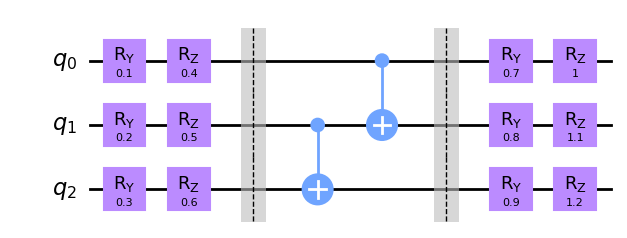

In [10]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
encode = circuit.bind_parameters(x)
encode.decompose().draw("mpl")

#### Feature maps

* __Rationale__
    - In machine learning, a common application is the classification of data into two or more categories. 
    - This involves encoding a datapoint into a feature map that maps classical feature vectors into the quantum Hilbert space. 
    -  Constructing quantum feature maps based on parameterized quantum circuits that are hard to simulate classically is an important step towards obtaining a potential advantage over classical machine learning approaches and is an active area of current research.

* __Definition__
    - A quantum feature map, $\phi(\vec{x})$, maps a classical feature vector, $\vec{x}$ to a quantum Hilbert space, $|\phi(\vec{x})\rangle \langle \phi(\vec{x})|$.
    - The quantum feature map transforms $\vec(x) \rightarrow |\phi(\vec{x})\rangle$ using a unitary transformation $U_\phi(\vec{x})$, which is typically a parameterized quantum circuit.
    - This part will be explained in the "Quantum feature maps and kernels" unit.

#### ZZFeatureMap

* Qiskit has several data encoding circuits that can be used to encode classical data in quantum states and are used as feature maps for classification:
https://docs.quantum-computing.ibm.com/api/qiskit/circuit_library#data-encoding-circuits

* `ZZFeatureMap` is a Second-order Pauli-Z evolution circuit (https://docs.quantum-computing.ibm.com/api/qiskit/qiskit.circuit.library.ZZFeatureMap) and is a type of parameterized circuit that can be utilized to pass our data points to this feature map.

* Main parameters are:
    - `feature_dimension`: Number of features
    - `reps`: The number of repeated circuits, has a min. value of 1.
    - `insert_barriers`: If `True`, barriers are inserted in between the evolution instructions and hadamard layers.

#### Example

* The Qiskit `ZZFeatureMap` circuit with 3 qubits, only encodes a data point of 3 features, despite having 6 parameterized gates:

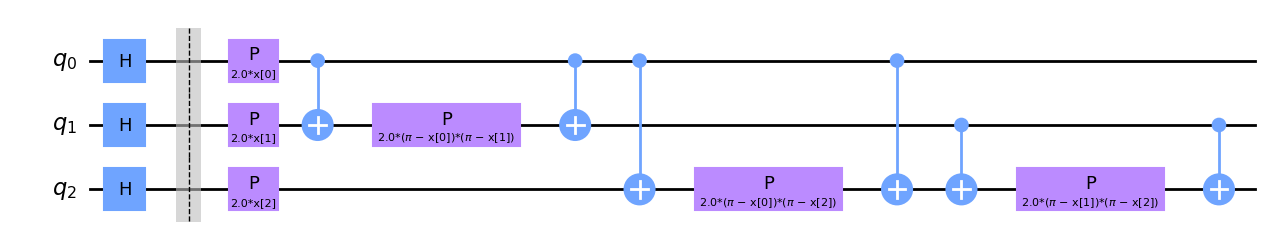

In [5]:
from qiskit.circuit.library import ZZFeatureMap
circuit = ZZFeatureMap(3, reps=1, insert_barriers=True)
circuit.decompose().draw("mpl")

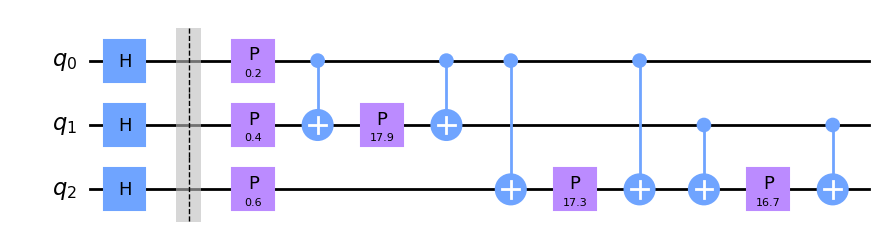

In [6]:
x = [0.1, 0.2, 0.3]
encode = circuit.bind_parameters(x)
encode.decompose().draw("mpl")

#### Other Qiskit data enconding circuits

* See: https://docs.quantum-computing.ibm.com/api/qiskit/circuit_library#data-encoding-circuits
    * `PauliFeatureMap`. The Pauli Expansion circuit.
    * `ZFeatureMap`. The first order Pauli Z-evolution circuit.
    * `ZZFeatureMap`. Second-order Pauli-Z evolution circuit.
    * `StatePreparation`. Complex amplitude state preparation.
    * `Initialize`. Complex amplitude initialization.

### 3.3.7. Other encodings

#### QuAM (Quantum Associative Memory)

![encoding_quam.png](images/quantum_nn/encoding_quam.png)

<!---* This encoding is based on superposition to encode a set of data points in a qubit register of the same length. 
* This requires a binary representation of all equally long values, or we need to pad with zeros. 
* Use a quantum associative memory (QuAM) to prepare a superposition of basis encoded values in the same qubit register format. -->

* Use a quantum associative memory (QuAM) to prepare a superposition of basis encoded values in the same qubit register
* Note that the quantum register is an equally weighted superposition of the basis encoded values.
* Both branches have a load and a storage part. 
* An additional element is first prepared into the load part of both branches. 
* Next, the processing branch is split in such a manner, that the new element gets a proper amplitude such that it can be brought into superposition with the already added elements. 
* Finally, an Uncompute cleans the processing branch to be ready for the next iteration.

![encoding_quam_solution.png](images/quantum_nn/encoding_quam_solution.png)

#### QRAM (Quantum Random Access Memory)

![encoding_qram.png](images/quantum_nn/encoding_qram.png)

* When a classical random access memory (RAM) gets an address to a memory index, it transfers the data value stored at this address into a specified output register.
* The functionality of quantum random access memory (QRAM) is similar, however, the registers are not classical but quantum registers.
* Consequently, the address and output registers can be in superposition instead of only single values.
* The solution sketch demonstrates the loading process of a QRAM holding a superposition of the first two addresses as input register.
* The computational properties are similar to Basis and QuAM encoding: As a superposition of the encoded data values is prepared, data can be processed in parallel (quantum parallelism), and arithmetic operations such as addition or multiplication can be used.

![encoding_qram_solution.png](images/quantum_nn/encoding_qram_solution.png)

<!--
#### Codificación Qsample

* La codificación Qsample es un caso híbrido de codificación de bases y amplitud. 
* Qsample asocia un vector de amplitud real con distribuciones de probabilidad discretas clásicas. 
* Utilizamos la amplitud, pero al mismo tiempo, todas las características se codifican en el qubit. 
* Para una distribución de probabilidad dada, la preparación del estado funciona de la misma manera que en la codificación de amplitud. -->

<!--
#### Codificación divide y vencerás

* La codificación divide y vencerás carga un vector $N$-dimensional con ventaja de tiempo exponencial utilizando un circuito cuántico con profundidad polilogarítmica e información entrelazada en qubits auxiliares (ancillary). 
* Los resultados muestran que podemos cargar datos eficientemente en dispositivos cuánticos utilizando una estrategia de divide y vencerás para intercambiar tiempo computacional por espacio. 
-->